# Importing
<ol>
    <li>
        importing all the required libraries for reading the file and work with data
    </li>  
    <li>
        importing the logistic regression model
    </li>
</ol>  

In [80]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score


# Reading the file

In [2]:
df=pd.read_csv("C:/Users/dell/OneDrive/Desktop/AMIT ML/Pandas/Titanic-Dataset.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#df['Cabin'].fillna("unkown",inplace=True)

In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# The cleaning phase
<ol>
    removing all the not required columns
</ol>
<ol>
    removing duplicates
</ol>    

In [8]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
#df["Age"].fillna(0,inplace=True)

In [11]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


# Bringing the unique features

In [12]:
data_types  =df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"data_types": data_types,"num_unique": n_uniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
data_types,int64,int64,object,float64,int64,int64,float64,object,object
num_unique,2,3,2,88,7,7,248,147,3


# Bringing the Null values

In [13]:
Null = df.isnull().sum()
ratio  = Null/df.shape[0]
pd.DataFrame({"Null":Null, "Ratio":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245


In [14]:
df = df.dropna(subset=['Embarked'])

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [16]:
df.shape

(889, 9)

In [17]:
df.shape

(889, 9)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# The Visualization Phase

Text(0, 0.5, 'probability')

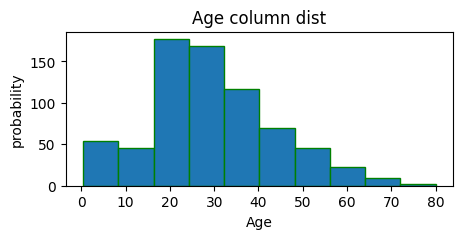

In [19]:
plt.figure(figsize=(5,2))
plt.hist(df["Age"],edgecolor="green")
plt.title("Age column dist")
plt.xlabel("Age")
plt.ylabel("probability")


<Axes: ylabel='Frequency'>

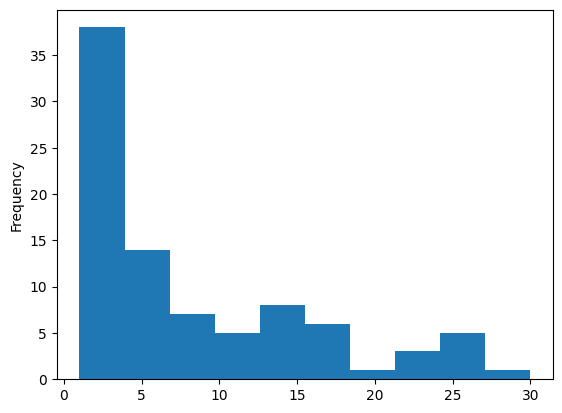

In [20]:
df.Age.value_counts().plot(kind='hist')

In [21]:
median = df["Age"].median()
df["Age"].fillna(median, inplace=True)

In [22]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,28.0,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


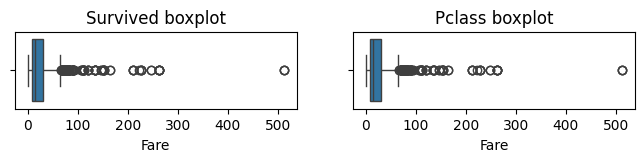

In [23]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
    if i < 2:

        plt.subplot(1,2,i+1)
        sns.boxplot(df['Fare'],orient='h')
        plt.title(f"{col} boxplot")


In [24]:
cols = ["Pclass","SibSp","Parch","Sex","Survived"]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,category,category,category,float64,category,category,float64,object,object


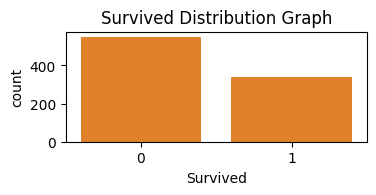

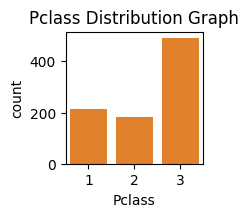

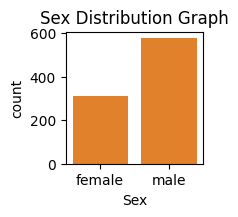

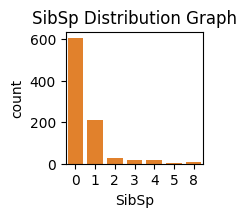

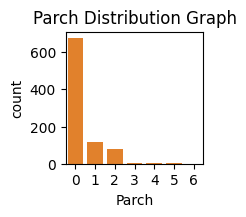

In [25]:
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(14,4))
for i , col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col, data=df)
    sns.countplot(x=col,data=df)
    plt.title(f"{col} Distribution Graph")
    plt.subplots_adjust(hspace=.8,wspace=.3)
    plt.show()


In [26]:
df.duplicated().sum()

110

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [29]:
#df = df.drop('Name',axis=1)

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [31]:
df.duplicated().sum()

110

In [33]:
#df = df.drop('PassengerId',axis=1)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [35]:
df.duplicated().sum()

110

In [38]:
#df = df.drop('Ticket',axis=1)

In [39]:
df.duplicated().sum()

110

In [40]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,28.0,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [41]:
df.shape

(889, 9)

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df.duplicated().sum()

0

<Axes: xlabel='Total'>

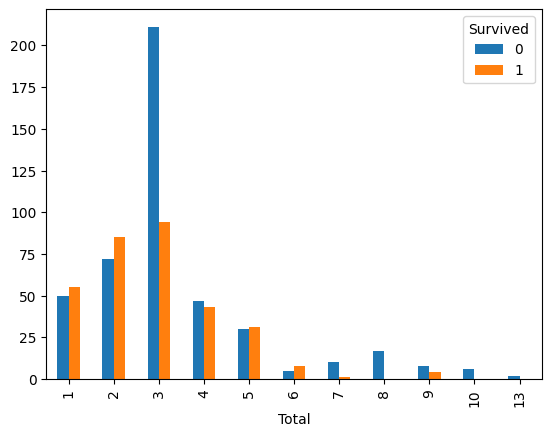

In [44]:
df['Total']  = df[['Pclass','SibSp','Parch']].sum(axis=1)
df.groupby(['Total','Survived']).size().unstack().plot(kind='bar')


In [46]:
df.dropna(inplace=True)

# Profile Report

In [47]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Total
1,1,1,female,38.0,1,0,71.2833,C85,C,2
3,1,1,female,35.0,1,0,53.1000,C123,S,2
6,0,1,male,54.0,0,0,51.8625,E46,S,1
10,1,3,female,4.0,1,1,16.7000,G6,S,5
11,1,1,female,58.0,0,0,26.5500,C103,S,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1 to 889
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  201 non-null    category
 1   Pclass    201 non-null    category
 2   Sex       201 non-null    category
 3   Age       201 non-null    float64 
 4   SibSp     201 non-null    category
 5   Parch     201 non-null    category
 6   Fare      201 non-null    float64 
 7   Cabin     201 non-null    object  
 8   Embarked  201 non-null    object  
 9   Total     201 non-null    int64   
dtypes: category(5), float64(2), int64(1), object(2)
memory usage: 19.6+ KB


# Converting all the text into numbers 

In [55]:
def transformation(x):

    data = {k:idx for idx,k in enumerate(df[x].unique())}
    df[x].replace(data,inplace=True)

In [60]:

ob_cols=list(df.select_dtypes('object').columns)

print(ob_cols)
for coll in ob_cols:
        transformation(coll)

['Cabin', 'Embarked']


In [56]:
transformation('Sex')

In [61]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Total
1,1,1,0,38.0,1,0,71.2833,0,0,2
3,1,1,0,35.0,1,0,53.1000,1,1,2
6,0,1,1,54.0,0,0,51.8625,2,1,1
10,1,3,0,4.0,1,1,16.7000,3,1,5
11,1,1,0,58.0,0,0,26.5500,4,1,1


# Starting the supervised model

In [62]:
X = df.drop(columns=['Survived']).values
y = df['Survived']

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

# Using the logistic Regression

In [66]:
log = LogisticRegression()

In [67]:
log.fit(X_train,y_train)

LogisticRegression()

In [68]:
pre = log.predict(X_test)

In [70]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.95      0.88      0.91        40

    accuracy                           0.86        51
   macro avg       0.79      0.85      0.81        51
weighted avg       0.88      0.86      0.87        51



In [71]:
accuracy_score(y_test,pre)

0.8627450980392157

# The prediction Phase

In [78]:
log.predict(X)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [79]:
log.classes_

array([0, 1], dtype=int64)